# Import Necessary Libraries

In [98]:
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import scipy as sp
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import shapiro
from scipy.stats import normaltest
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

## Read in Data to DataFrame

In [2]:
df = pd.read_csv('vehicles.csv')

In [3]:
df.drop(columns=['id', 'county', 'url', 'region_url', 'image_url', 'description', 'vin', 'region', 'model', 'lat', 'long'], inplace=True)

In [4]:
df = df[df['price'] > 500]
df = df[df['price'] < 5000000]

In [5]:
df = df[df['odometer'] < 400000 ]

In [6]:
df.dropna(subset = ['manufacturer'], inplace = True)

In [7]:
df.dropna(subset = ['condition'], inplace = True)

In [8]:
df.dropna(subset=['size'], inplace = True)

In [9]:
df.dropna(subset = ['odometer'], inplace = True)

In [10]:
df.dropna(subset = ['fuel'], inplace = True)

In [11]:
title_dict = {'clean':1, 'rebuilt':1, 'salvage':0, 'lien':0, 'missing':0, 'parts only':0}
df['title_status'].replace(title_dict, inplace = True)

In [12]:
condition_dict = {'excellent':'good', 'new':'good', 'good':'ok', 'like new':'ok', 'fair':'poor', 'salvage':np.nan}
df.condition.replace(condition_dict, inplace = True)
df.dropna(subset = ['condition'], inplace = True)

In [13]:
cylinder_dict = {'12 cylinders':10, '10 cylinders':10, '8 cylinders':8, '6 cylinders':6, '5 cylinders':5, '4 cylinders':4, '3 cylinders':3, 'other':np.nan}
df.cylinders.replace(cylinder_dict, inplace = True)
df.dropna(subset = ['cylinders'], inplace = True)

In [14]:
manufact_dict1 = {'ford': 1, 'chevrolet':1, 'toyota':3, 'honda':3, 'nissan':3, 'gmc':1, 'ram':1, 'jeep':1,
       'dodge':1, 'bmw':2, 'volkswagen':2, 'hyundai':3, 'subaru':1, 'mercedes-benz':2,
       'chrysler':1, 'kia':3, 'cadillac':1, 'lexus':3, 'buick':1, 'mazda':3, 'audi':2,
       'pontiac':1, 'acura':3, 'lincoln':1, 'infiniti':3, 'volvo':2, 'mitsubishi':3,
       'mercury':1, 'mini':2, 'saturn':1, 'rover':2, 'jaguar':2, 'fiat':2, 'alfa-romeo':2,
       'harley-davidson':np.nan, 'datsun':2, 'land rover':2, 'ferrari':2, 'porche':2,
       'aston-martin':2, 'morgan':2, 'tesla':1, 'hennessey':np.nan}
df.manufacturer.replace(manufact_dict1, inplace = True)
df.dropna(subset = ['manufacturer'], inplace = True)
manufact_dict2 = {1:'usa', 2:'euro', 3:'asia'}
df.manufacturer.replace(manufact_dict2, inplace = True)

In [15]:
state_dict = {'ca':1, 'fl':1, 'ny':1, 'tx':1, 'mi':1, 'wi':1, 'oh':1, 'nc':1, 'pa':1, 'or':1, 'va':1, 'mn':1,
       'tn':0, 'co':0, 'ma':1, 'ia':0, 'il':1, 'in':1, 'al':1, 'nj':1, 'az':0, 'ky':0, 'sc':1, 'ks':0,
       'mo':0, 'ok':0, 'id':0, 'mt':0, 'ga':1, 'ct':1, 'vt':0, 'ar':0, 'wa':1, 'nm':0, 'md':1, 'la':1,
       'nh':1, 'ms':1, 'ri':1, 'ak':1, 'me':1, 'dc':1, 'nv':0, 'sd':0, 'hi':1, 'ne':0, 'de':1, 'nd':0,
       'wv':0, 'ut':0, 'wy':0} 
df.state.replace(state_dict, inplace = True)
df.dropna(subset = ['state'], inplace = True)
df['coast'] = df['state']
df.drop(columns = ['state'], inplace = True)

In [16]:
color_dict={'white':1, 'black':1, 'silver':1, 'grey':1, 'blue':1, 'red':1, 'green':1, 'brown':1,
       'custom':0, 'yellow':0, 'orange':0, 'purple':0}
df.paint_color.replace(color_dict, inplace = True)
df.dropna(subset = ['paint_color'], inplace = True)

In [17]:
transmission_dict = {'automatic':1, 'other':1, 'manual':0}
df.transmission.replace(transmission_dict, inplace = True)
df.dropna(subset = ['transmission'], inplace = True)

In [19]:
drive_dict = {'4wd':1, 'fwd':0, 'rwd':0}
df.drive.replace(drive_dict, inplace = True)
df.dropna(subset = ['drive'], inplace = True)

In [20]:
type_dict = {'SUV':'suv', 'sedan':'car', 'truck':'truck', 'pickup':'truck', 'coupe':'car', 'van':'van', 'hatchback':'car',
       'mini-van':'van', 'convertible':'car', 'wagon':'car', 'other':np.nan, 'offroad':'suv', 'bus':'van'}
df.type.replace(type_dict, inplace = True)
df.dropna(subset = ['type'], inplace = True)

In [21]:
fuel_dict = {'hybrid':'other', 'electric':'other'}
df.fuel.replace(fuel_dict, inplace = True)

In [22]:
df.dropna(inplace = True)

In [23]:
df.shape

(99577, 14)

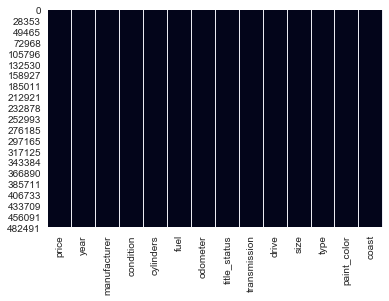

In [24]:
sns.heatmap(df.isnull(), cbar = False)

In [25]:
df['price'] = [float(i) for i in df['price']]

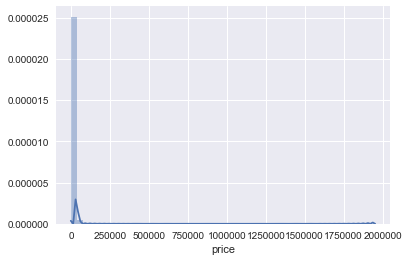

In [26]:
sns.distplot(df.price)

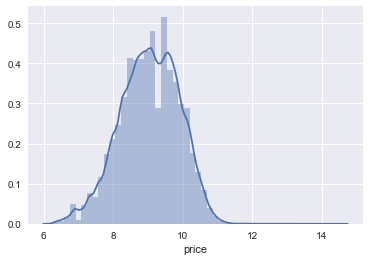

In [27]:
sns.distplot(np.log(df.price))

In [28]:
df['log_price'] = np.log(df.price)

In [29]:
df['age'] = 2020 - df['year']

In [30]:
df.shape

(99577, 16)

In [31]:
df.reset_index(inplace=True)

In [32]:
df.drop(columns = ['index', 'year'], inplace = True)

In [36]:
dummies_df = pd.get_dummies(df, columns = ['manufacturer', 'condition', 'cylinders', 'fuel', 'size', 'type'], drop_first = True)

In [37]:
dummies_df.head()

,price,odometer,title_status,transmission,drive,paint_color,coast,log_price,age,manufacturer_euro,manufacturer_usa,condition_ok,condition_poor,cylinders_4.0,cylinders_5.0,cylinders_6.0,cylinders_8.0,cylinders_10.0,fuel_gas,fuel_other,size_full-size,size_mid-size,size_sub-compact,type_suv,type_truck,type_van
0,17899.0,63500.0,1,0.0,1.0,1.0,0,9.792500,8.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,4600.0,110982.0,1,1.0,0.0,1.0,0,8.433812,12.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,28000.0,67348.0,1,1.0,1.0,1.0,0,10.239960,16.0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0
3,2500.0,129000.0,1,0.0,0.0,1.0,0,7.824046,16.0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
4,12000.0,65000.0,1,1.0,0.0,1.0,0,9.392662,5.0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0


In [38]:
dummies_df.drop(columns = ['price', 'log_price'], inplace = True)
dummies_df.head()

,odometer,title_status,transmission,drive,paint_color,coast,age,manufacturer_euro,manufacturer_usa,condition_ok,condition_poor,cylinders_4.0,cylinders_5.0,cylinders_6.0,cylinders_8.0,cylinders_10.0,fuel_gas,fuel_other,size_full-size,size_mid-size,size_sub-compact,type_suv,type_truck,type_van
0,63500.0,1,0.0,1.0,1.0,0,8.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,110982.0,1,1.0,0.0,1.0,0,12.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,67348.0,1,1.0,1.0,1.0,0,16.0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0
3,129000.0,1,0.0,0.0,1.0,0,16.0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
4,65000.0,1,1.0,0.0,1.0,0,5.0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0


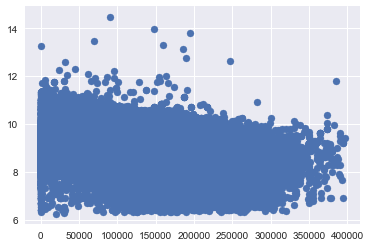

In [53]:
plt.scatter(dummies_df.odometer, df.log_price)

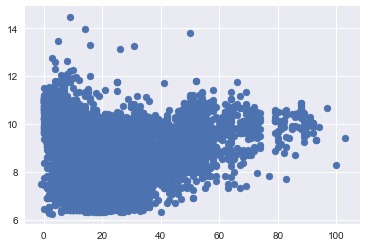

In [52]:
plt.scatter((dummies_df.age), df.log_price)

In [139]:
X = dummies_df
y = df[['log_price']]
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [136]:
X.corr()

,odometer,title_status,transmission,drive,paint_color,coast,age,manufacturer_euro,manufacturer_usa,condition_ok,condition_poor,cylinders_4.0,cylinders_5.0,cylinders_6.0,cylinders_8.0,cylinders_10.0,fuel_gas,fuel_other,size_full-size,size_mid-size,size_sub-compact,type_suv,type_truck,type_van
odometer,1.000000,0.060995,-0.010221,0.064515,0.001403,-0.013186,0.308573,-0.073333,0.023696,0.093903,0.173374,-0.142446,0.014173,0.035871,0.100475,0.001007,-0.099214,0.004988,0.086594,-0.044141,-0.027844,0.037780,0.086790,0.011992
title_status,0.060995,1.000000,0.018985,0.004033,-0.006972,0.005381,0.039077,0.006449,0.015548,-0.014314,-0.016934,-0.021895,0.008255,0.008655,0.008623,0.011139,0.001675,-0.004480,0.013641,0.005390,0.001849,0.015864,-0.003086,0.016348
transmission,-0.010221,0.018985,1.000000,0.070685,0.024656,0.006067,-0.197351,-0.068685,0.055364,-0.006119,-0.057557,-0.137739,-0.007941,0.044102,0.091336,0.006163,-0.007777,0.022560,0.155210,-0.012916,-0.085223,0.089106,0.038704,0.061681
drive,0.064515,0.004033,0.070685,1.000000,0.004501,-0.071865,-0.096023,-0.040702,0.211005,-0.026595,-0.020457,-0.300224,-0.038374,0.024124,0.275819,0.006301,-0.147012,-0.058813,0.261634,-0.118474,-0.064041,0.304779,0.348032,-0.195273
paint_color,0.001403,-0.006972,0.024656,0.004501,1.000000,0.022504,-0.084147,0.017833,-0.034698,-0.038032,0.001438,0.020848,0.006245,-0.002754,-0.012534,-0.031848,-0.018680,0.013939,-0.025985,0.028726,-0.003841,-0.020263,0.004827,-0.001651
coast,-0.013186,0.005381,0.006067,-0.071865,0.022504,1.000000,0.014702,0.038663,-0.047470,-0.030577,0.010279,0.035897,0.009927,0.013696,-0.050826,0.000476,0.030213,-0.000891,-0.050616,0.032600,0.007923,-0.014235,-0.057119,0.001410
age,0.308573,0.039077,-0.197351,-0.096023,-0.084147,0.014702,1.000000,0.016842,0.038821,0.073438,0.193966,-0.160674,0.013817,0.003705,0.146811,0.018601,0.020502,-0.030091,0.009997,-0.016324,-0.005356,-0.066139,0.019946,-0.027408
manufacturer_euro,-0.073333,0.006449,-0.068685,-0.040702,0.017833,0.038663,0.016842,1.000000,-0.429414,-0.042953,-0.008296,0.045650,0.219996,0.028766,-0.118389,-0.006899,0.011453,-0.028111,-0.143308,0.057246,0.065668,-0.043601,-0.207293,-0.060407
manufacturer_usa,0.023696,0.015548,0.055364,0.211005,-0.034698,-0.047470,0.038821,-0.429414,1.000000,0.039410,0.015814,-0.333297,-0.084012,-0.040430,0.375308,0.050147,-0.117568,-0.074897,0.291837,-0.153522,-0.063422,-0.005918,0.352005,0.046429
condition_ok,0.093903,-0.014314,-0.006119,-0.026595,-0.038032,-0.030577,0.073438,-0.042953,0.039410,1.000000,-0.178155,-0.025786,-0.007477,0.003142,0.017842,0.029457,0.007395,-0.007067,0.054288,-0.036420,-0.026519,-0.008668,0.021933,0.044439


In [137]:
from sklearn import tree
regTree = tree.DecisionTreeRegressor()
regTree = regTree.fit(X_train, y_train)

In [138]:
regTree.score(X_test, y_test)

0.6937684010005272

In [63]:
y_pred = np.exp(regTree.predict(X_test))

In [65]:
rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), y_pred))
rmse

5709.731062982452

In [67]:
rmse

5709.731062982452

In [79]:
test_std = np.exp(y_test).std()
test_std


log_price    10005.775578
dtype: float64

In [77]:
np.exp(y_test).mean()

log_price    11713.924081
dtype: float64

In [74]:
rmse/test_std

log_price    0.570644
dtype: float64

In [75]:
scale = StandardScaler()
transformed_train = scale.fit_transform(X_train)
X_train = pd.DataFrame(transformed_train, columns = X_train.columns)
transformed_test = scale.transform(X_test)
X_test = pd.DataFrame(transformed_test, columns = X_test.columns)
#transformed_train = scale.fit_transform(X_train_df_poly)
#X_train_transformed = pd.DataFrame(transformed_train, columns = X_train_df_poly.columns)
#transformed_test = scale.transform(X_test_df_poly)
#X_test_transformed = pd.DataFrame(transformed_test, columns = X_test_df_poly.columns)

In [80]:
regTree = tree.DecisionTreeRegressor()
regTree = regTree.fit(X_train, y_train)
y_pred = np.exp(regTree.predict(X_test))
rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), y_pred))
rmse/test_std

log_price    0.591371
dtype: float64

In [85]:
lasso = Lasso(alpha=200, normalize=False)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), y_pred))
rmse/test_std

log_price    1.538964
dtype: float64

In [86]:
ridge = Ridge(alpha=200, normalize=False)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), y_pred))
rmse

15398.214339037735

In [87]:
rmse/test_std

log_price    1.538933
dtype: float64

In [88]:
bayes = linear_model.BayesianRidge()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), y_pred))
rmse

/Users/lucas/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


15398.213703316345

In [89]:
rmse/test_std

log_price    1.538933
dtype: float64

In [90]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), y_pred))
rmse

15398.213646617034

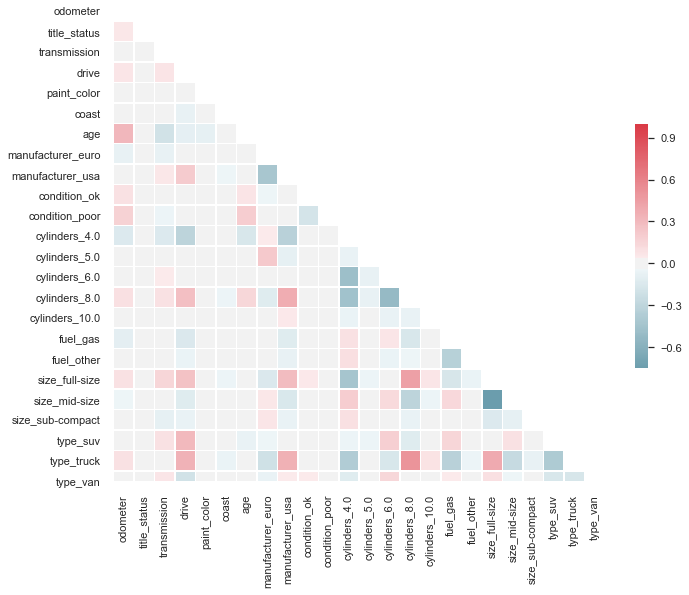

In [92]:
sns.set(style="white")

corr = X_train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [112]:
kf = KFold(n_splits=10, shuffle=False).split(X)
kf

<generator object _BaseKFold.split at 0x1c3811f8e0>

In [113]:
for train_index, test_index in kf:
    print(train_index, test_index)

[ 9958  9959  9960 ... 99574 99575 99576] [   0    1    2 ... 9955 9956 9957]
[    0     1     2 ... 99574 99575 99576] [ 9958  9959  9960 ... 19913 19914 19915]
[    0     1     2 ... 99574 99575 99576] [19916 19917 19918 ... 29871 29872 29873]
[    0     1     2 ... 99574 99575 99576] [29874 29875 29876 ... 39829 39830 39831]
[    0     1     2 ... 99574 99575 99576] [39832 39833 39834 ... 49787 49788 49789]
[    0     1     2 ... 99574 99575 99576] [49790 49791 49792 ... 59745 59746 59747]
[    0     1     2 ... 99574 99575 99576] [59748 59749 59750 ... 69703 69704 69705]
[    0     1     2 ... 99574 99575 99576] [69706 69707 69708 ... 79660 79661 79662]
[    0     1     2 ... 99574 99575 99576] [79663 79664 79665 ... 89617 89618 89619]
[    0     1     2 ... 89617 89618 89619] [89620 89621 89622 ... 99574 99575 99576]


In [100]:
folds = StratifiedKFold(n_splits = 10)
folds

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [123]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [126]:
scores_linear = []
scores_ridge = []
scores_bayes_ridge = []
scores_lasso = []
scores_treeReg = []

for train_index, test_index in kf:
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    scores_treeReg.append(get_score(tree.DecisionTreeRegressor(), X_train, X_test, y_train, y_test))
print(scores_treeReg) 

[]


In [142]:
print(cross_val_score(tree.DecisionTreeRegressor(), X_train, y_train, cv=10).mean())

0.6719717244258486


In [143]:
print(cross_val_score(linear_model.LinearRegression(), X_train, y_train, cv=10).mean())

0.6377665942800768


In [144]:
print(cross_val_score(linear_model.Ridge(), X_train, y_train, cv=10).mean())

0.637766165721233


In [148]:
print(cross_val_score(linear_model.Lasso(), X_train, y_train, cv=10).mean())

0.31668924382335584
